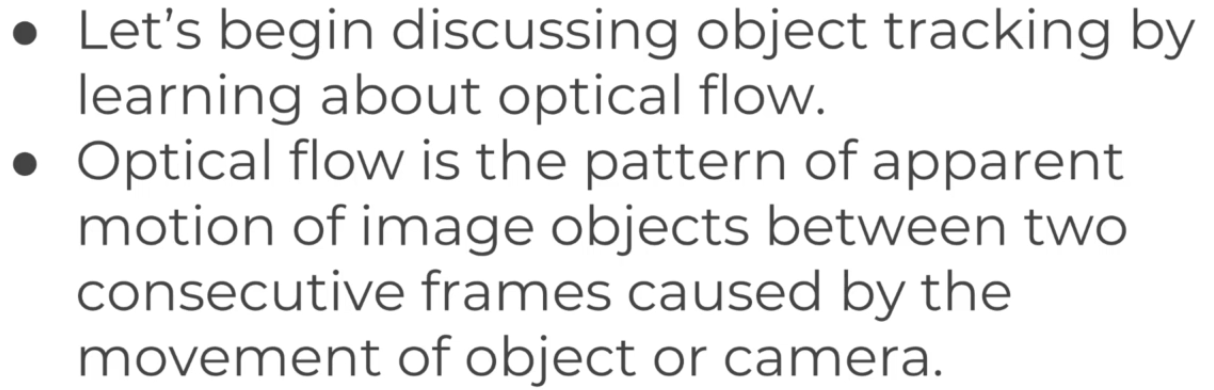

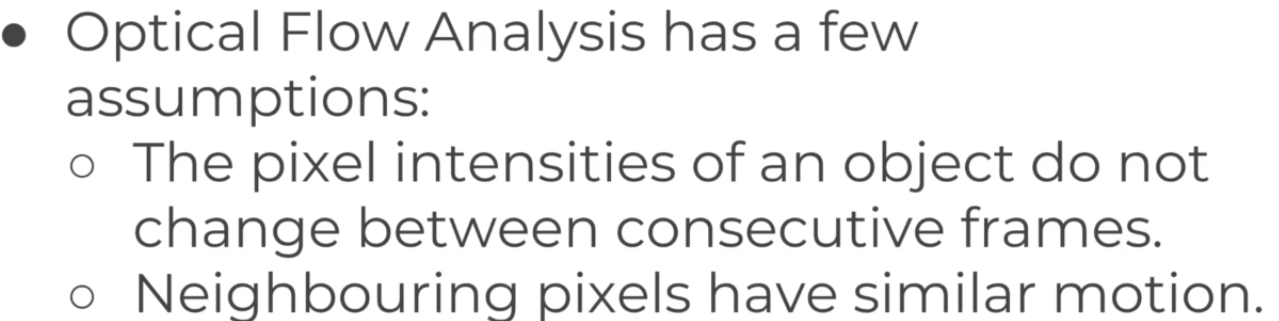
* Means we wont try to track a light bulb that's turning on and off.
* Means will be tracking pixels having similar motion not the pixels that are static in the image.

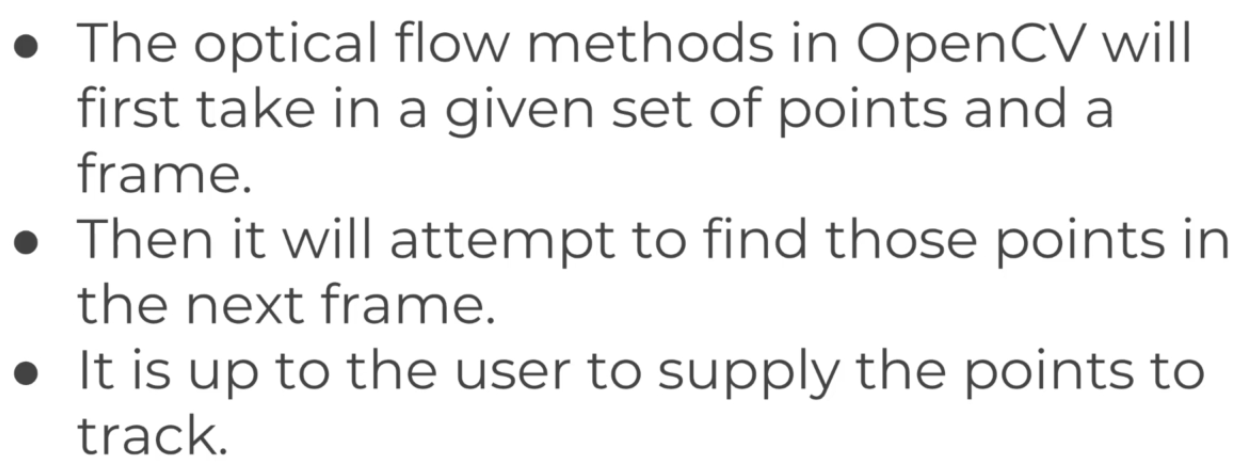

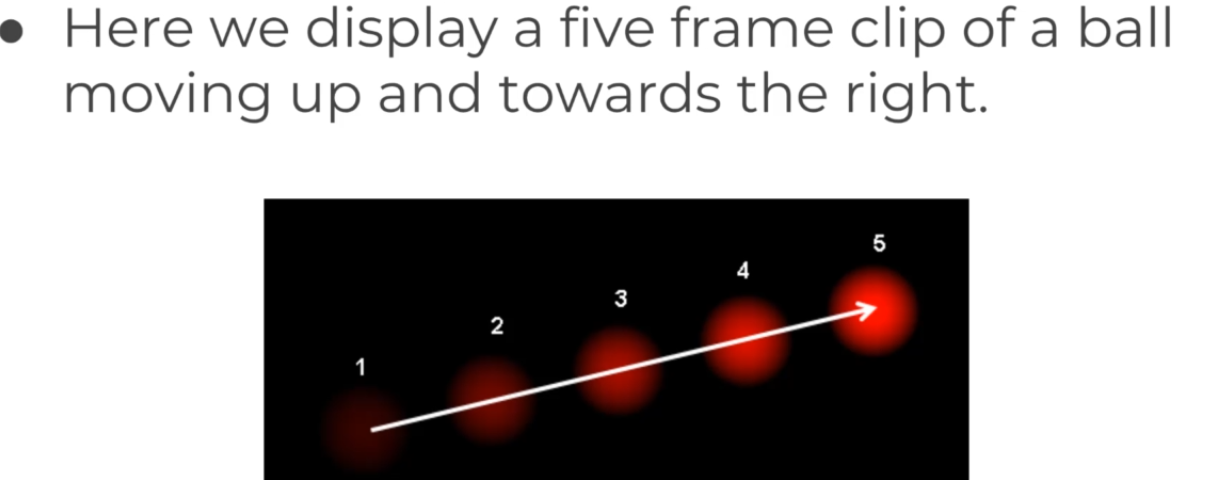

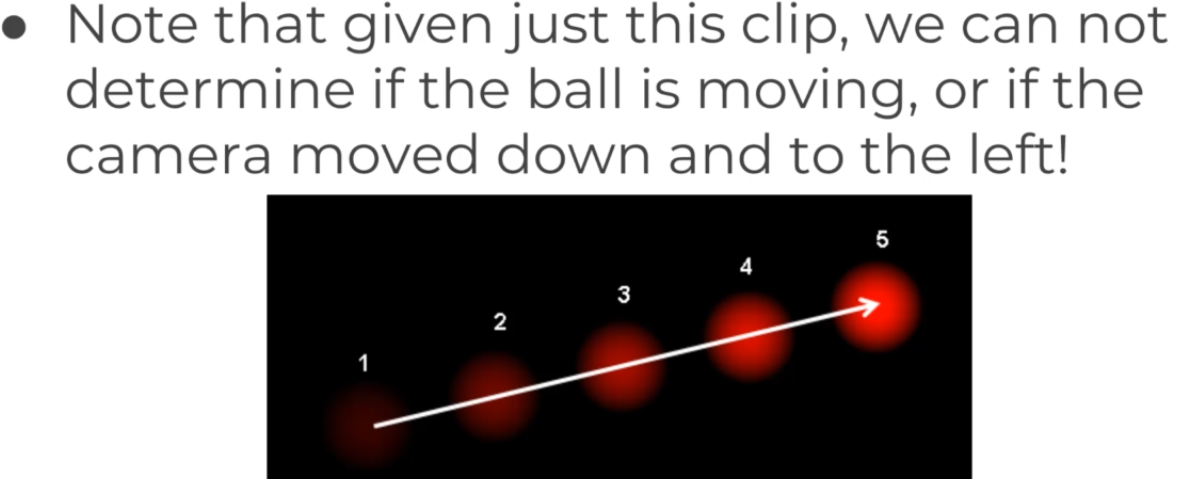

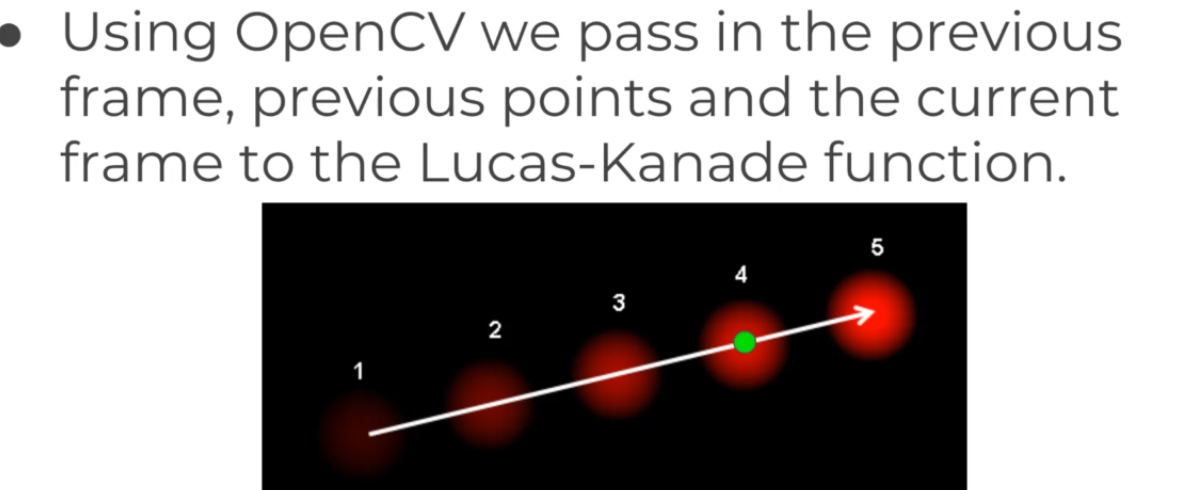
* Lets say we want to track frame 4 of the image as it is the most recent frame after 5. 
* We need to tell opencv what point to track.
* We can select a point manually by clicking on the image of the first frame and let opencv track from there OR we can detect lets say face and tell opencv to track the face.

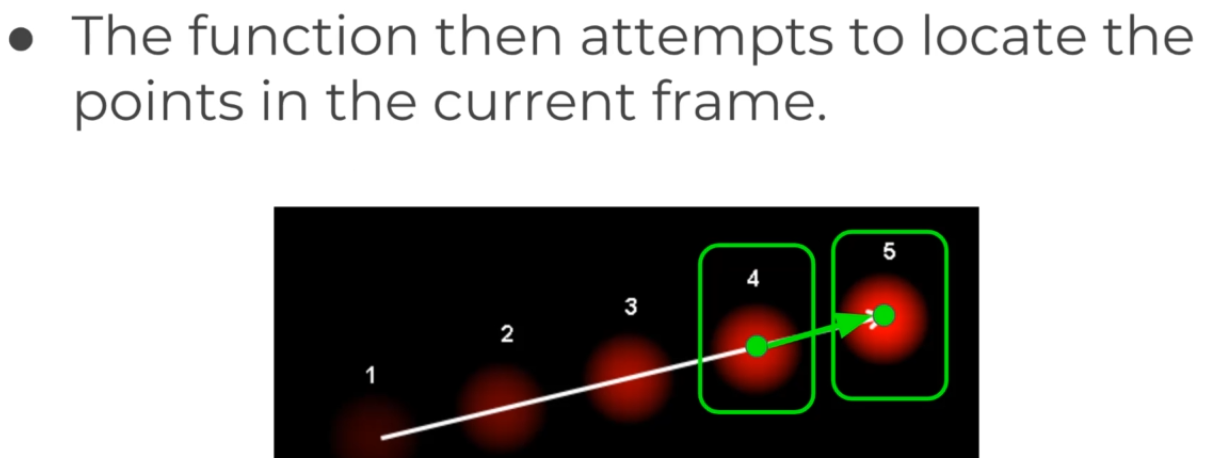

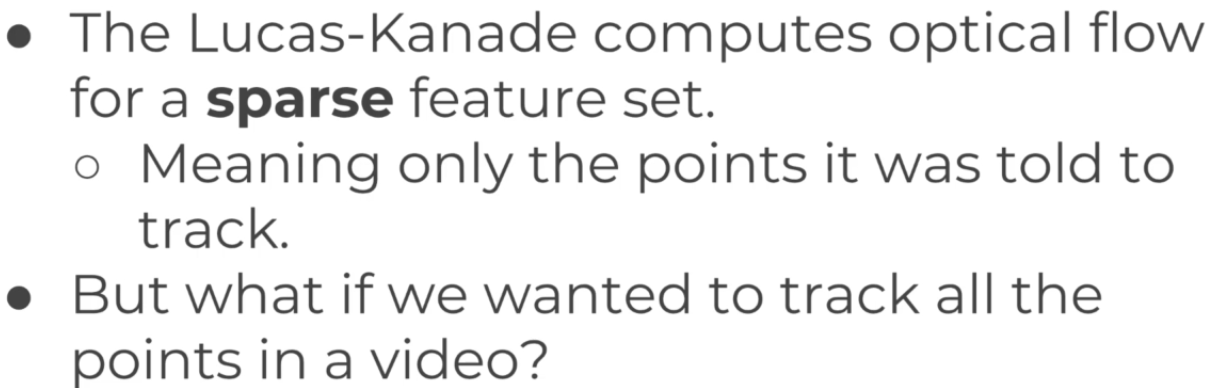

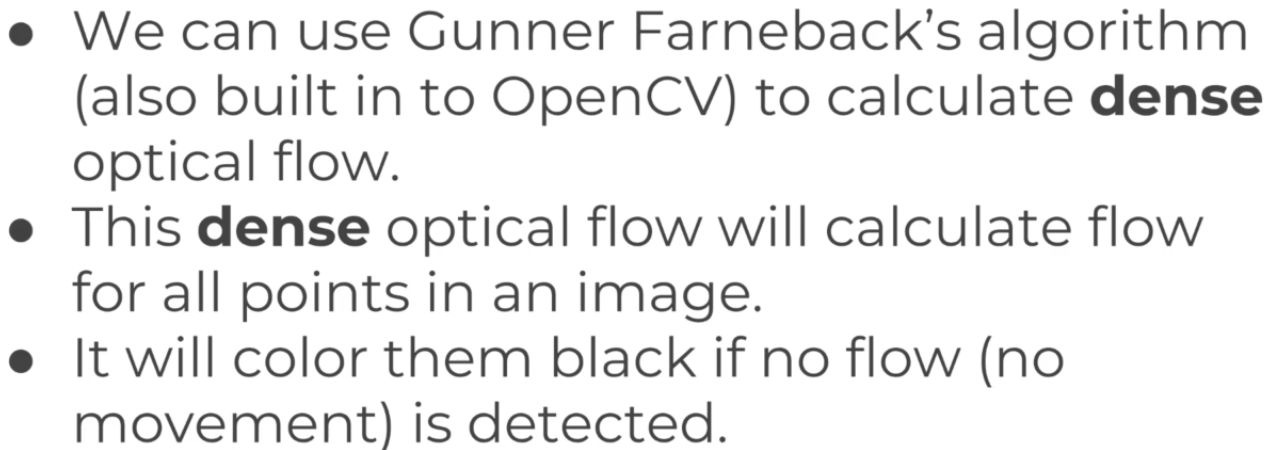

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [5]:
corner_track_params = dict(maxCorners = 10 , qualityLevel = 0.3 , minDistance = 7 , blockSize = 7)
LK_params = dict(winSize = (200,200),maxLevel = 2,criteria = (cv.TERM_CRITERIA_EPS|cv.TERM_CRITERIA_COUNT, 10 , 0.03))
# winSize is the size of the window the greater the size the more noise we will have.
# maxLevel is the level of image resolution we want to track. 
# See here [https://en.wikipedia.org/wiki/Pyramid_(image_processing)]
# criteria is the criteria we will use for lucas kanade optical flow, we provided two criterias, and max number of iterations
# 0.03 is the EPS or epsilon value , smaller value means we will finish tracking earlier
# 10 is criteria count or number of iterations

In [3]:
cap = cv.VideoCapture(0)

ret , prev_frame = cap.read()

prev_gray = cv.cvtColor(prev_frame,cv.COLOR_BGR2GRAY)

# Points to track
prevPts = cv.goodFeaturesToTrack(prev_gray,mask=None,**corner_track_params)

# a picture to draw on
mask = np.zeros_like(prev_frame)

while True:
    
    # current frame
    ret,frame = cap.read()
    frame_gray = cv.cvtColor(frame_frame,cv.COLOR_BGR2GRAY)
        
    nextPts , status , err = cv.calcOpticalFlowPyrLK(prev_gray,frame_gray,prevPts,None,**LK_params)
    # functions returns 0 as status value if the features are not found, if found it returns 1 
    good_new = nextPts[status == 1]
    good_prev = prevPts[status == 1]
    
    for i , (new,prev) in enumerate(zip(good_new,good_prev)): 
        x_new , y_new = new.ravel()
        x_prev, y_prev = prev.ravel()
        
        
        mask = cv.line(mask,(x_new,y_new),(x_prev,y_prev),(255,0,0),2)
        
        frame = cv.circle(frame,(x_new,y_new),10,(0,0,255),-1)
        
    img = cv.add(frame,mask) # adds mask(lines) and frame(circles) 
    cv.imshow('Tracking',img)
    
    k = cv.waitKey(500) & 0xFF
    if k == 27:
        break
        
    prev_gray = frame_gray.copy()
    prevPts = good_new.reshape(-1,1,2)
        
cv.destroyAllWindows()